In [102]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import ImageChops
from PIL import ImageOps
from PIL import ImageStat as stat

In [103]:
def statystyki(im):
    print("tryb obrazu", im.mode)
    print("rozmiar obrazu", im.size)
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

def statystyki_z_maska(im, maska):
    print("tryb obrazu", im.mode,  "tryb maski",  maska.mode)
    print("rozmiar obrazu", im.size, "rozmiar maski", maska.size)
    s = stat.Stat(im, mask = maska)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

(212, 259) RGB


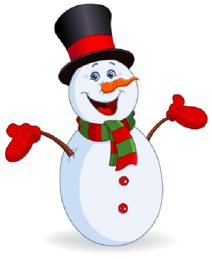

In [104]:
im_b = Image.open('balwan1.png')
print(im_b.size, im_b.mode)
im_b

Zmiana wielkosci obrazu

Image.resize(size, resample=None, box=None, reducing_gap=None)
resample – An optional resampling filter:
    Image.NEAREST (0), Image.LANCZOS (1), Image.BILINEAR (2), 
    Image.BICUBIC (3), Image.BOX (4) or Image.HAMMING (5)   

(424, 519) RGB


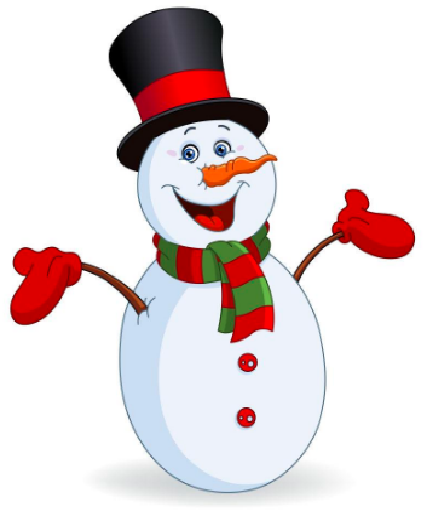

In [105]:
im = Image.open('balwan.png')
print(im.size, im.mode)
im

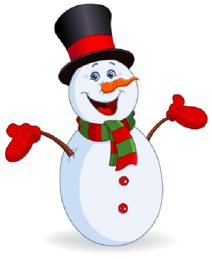

In [106]:
w,h = im.size
s_w = 0.5 # skala zmiany rozmiaru w 
s_h = 0.5 # skala zmiany rozmiaru h
w0 = int(w*s_w)
h0 = int(h*s_h)
im1 = im.resize((w0,h0), 3, reducing_gap = None) # domyśna metoda NEAREST
im1

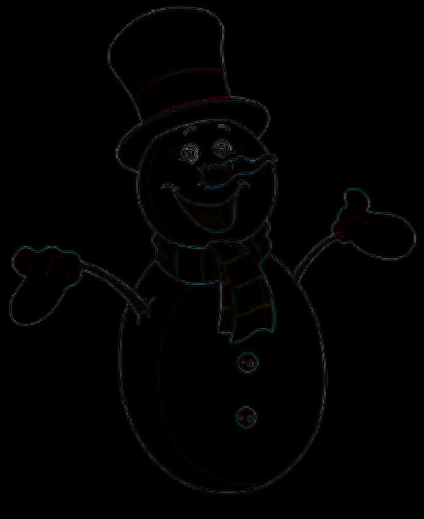

In [107]:
im2 = im1.resize((w,h), 3, reducing_gap = None)# domyśna metoda NEAREST
ImageChops.difference(im,im2)

wycinanie z jednoczesną zmianą rozmiaru wycinka

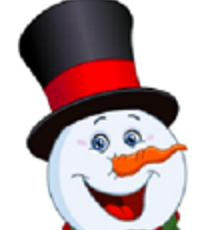

In [108]:
w_p = 45
h_p = 5
w_k = 150
h_k = 120
wycinek = (w_p, h_p, w_k, h_k) # definicja miejsca wycięcia w_p, h_p - lewy górny róg, w_k,h_k prawy dolny róg
wyc_w = wycinek[2] - wycinek[0] # szerokość wycinka
wyc_h = wycinek[3] - wycinek[1] # wysokość wycinka
s_w = 2 # skala dla szerokości
s_h = 2 # skala dla wysokości
glowa = im1.resize((s_w * wyc_w, s_h * wyc_h) , box = wycinek) # wycina wycinek i zmienia rozmiar wycinka
glowa

# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)

In [109]:
# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)
# angle: It is the angle in degrees counterclockwise.
# resample: It is an optional input. It can be one of PIL.Image.NEAREST (use the nearest neighbor), PIL.Image.BILINEAR (linear interpolation in a 2×2 environment), or PIL.Image.BICUBIC (cubic spline interpolation in a 4×4 environment). If omitted, or if the image has mode “1” or “P,” it is set PIL.Image.NEAREST. See Filters.
# expand: It is an optional input. If set to True, the images expand and become large enough to hold the entire rotated image. If set to False, the output image is of the same size as of input image.
# center: It is an optional input. It set the center of image rotation. By default, it is the center of the image.
# translate: It is an optional input. It is a post-rotate translation.
# fillcolor: It is an optional input. It is a color for an area outside the rotated image.

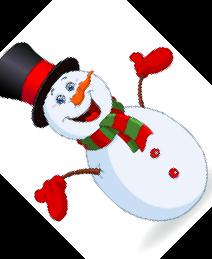

In [110]:
rot_45 = im1.rotate(45) # obrót o 45 stopni w lewo
rot_315 = im1.rotate(315) # obrót o 45 stopni w prawo = # obrót o 315 stopni w lewo
rot_45

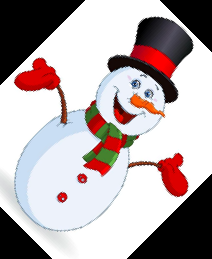

In [111]:
rot_315

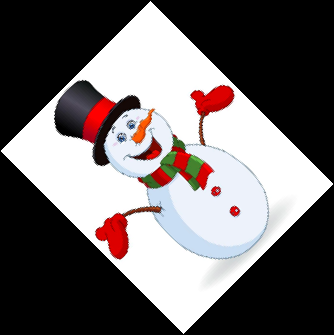

In [112]:
rot_45_exp = im1.rotate(45, expand=1) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
rot_45_exp

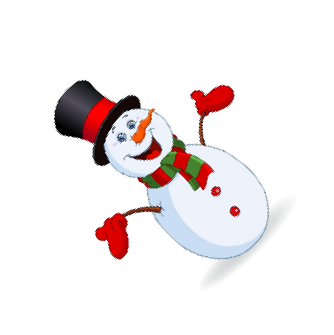

In [113]:
rot_45_exp_fill = im1.rotate(45, expand=1, fillcolor=(255,255,255)) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
# dodatkowe obszary, które musza powstac po obrocie zostały wypełnione kolorem białym
rot_45_exp_fill

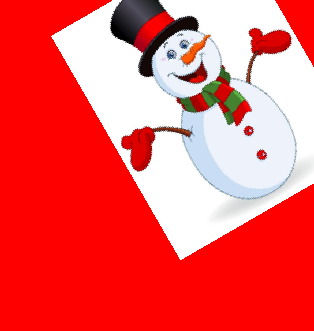

In [114]:
# obrót wokół punktu center domyslnie jest to obrót wokół srodka obrazu
rot_center = im1.rotate(30, expand=1, fillcolor=(255,0,0), center=(0,0)) # expand nie działa dobrze, gdy center nie jest środkiem obrazu
rot_center


# inne przekształcenia geometryczne
im.transpose(Image.FLIP_LEFT_RIGHT) \
im.transpose(Image.FLIP_TOP_BOTTOM) \
im.transpose(Image.TRANSPOSE) \
im.transpose(Image.TRANSVERSE)  

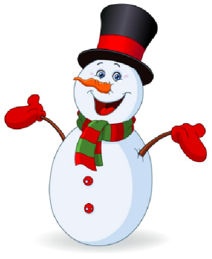

In [115]:
t1 = im1.transpose(Image.FLIP_LEFT_RIGHT)
t1


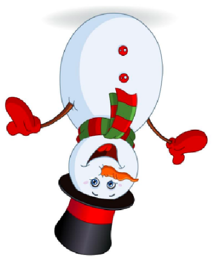

In [116]:
t2 = im1.transpose(Image.FLIP_TOP_BOTTOM)
t2




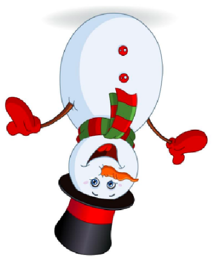

In [117]:
o1 = im1.rotate(180)
t2_1 = o1.transpose(Image.FLIP_LEFT_RIGHT)
t2_1
# o1


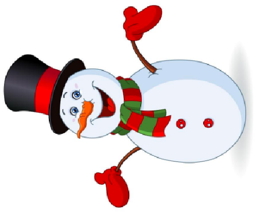

In [118]:
t3 = im1.transpose(Image.TRANSPOSE)
t3



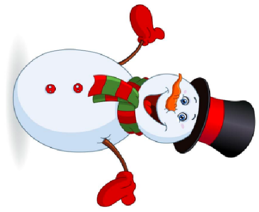

In [119]:
im1.transpose(Image.TRANSVERSE)

wycinanie fragmentu obrazu - Image.crop(box), gdzie box jest czwórką liczb

In [120]:
guzik_box = (118, 177, 130, 189)
guzik = im_b.crop(guzik_box)
guzik


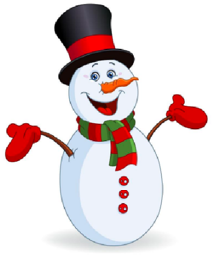

In [121]:
im1 = im_b.copy()
im1.paste(guzik, (118,190)) # paste - argumenty: obraz wklejany, miejsce wklejenia, ewentualnie maska
im1

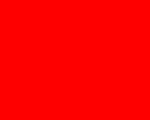

In [122]:
new = Image.new('RGB', (150, 120), im1.getpixel((100,40))) # tworzy nowy obraz, argumenty: tryb, wymiary obrazu, kolor
new

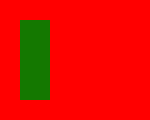

In [123]:
new.paste((20,120,0), (20, 20, 50, 100)) # koloorujemy box (20, 20, 50, 100) na kolor (20,120,0)
new

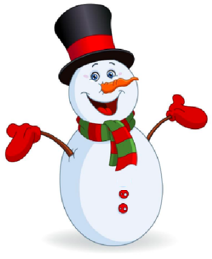

In [124]:
#usun guzik bałwankowi

im2 = im1.copy()
new1 = Image.new('RGB', (guzik_box[2]-guzik_box[0], guzik_box[3]-guzik_box[1]), im2.getpixel((150,160))) # tworzy nowy obraz, argumenty: tryb, wymiary obrazu, kolor
im2.paste(new1, (118,174))
im2

Zastosowane paste i crop , tworzenie maski, wklejanie z maską

im.paste(im1, box, mask), gdzie 
 im - obraz, do którego wklejamy
 im1 - obraz wklejany
 box - para liczb (położenie lewego górnego rogu wklejanego obrazu) 
lub box w postaci czwórki - wtedy box musi pokrywac sie z obrazem wklejanym
 mask - maska (obraz w trybie “1”, “L”, “LA”, “RGBA” )

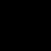

In [125]:
new2 = Image.new('L', (51, 51), 0)
new2

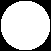

In [126]:
def zakres(w, h):  
    return [(i, j) for i in range(w) for j in range(h)]

def rysuj_kolo(obraz, m_s, n_s, r, kolor):
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w, h):
        if (i-m_s)**2+(j-n_s)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
            obraz1.putpixel((i,j), kolor)
    return obraz1

maska = rysuj_kolo(new2, 25, 25, 25, 255)
maska

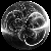

In [127]:
maska1 = Image.open('maska1.png')
maska1 = maska1.resize(maska.size)

new2.paste(maska1, mask = maska)
maska_L = new2.copy()
maska_L

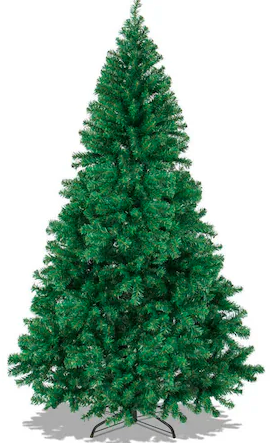

In [128]:
choinka =  Image.open('choinka.png')
choinka

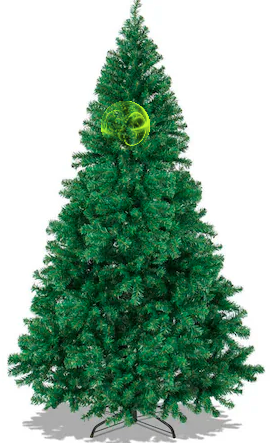

In [129]:
kolorowe_tlo = Image.open("kolorowe_tlo.png")
wycinek = kolorowe_tlo.crop((50,50,101,101))
choinka.paste(wycinek, (100,100), mask = maska_L)
choinka

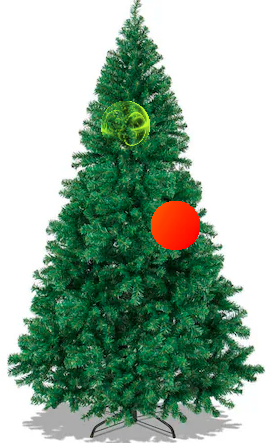

In [130]:
wycinek = kolorowe_tlo.crop((180,100,231,151))
choinka.paste(wycinek, (150,200), mask = maska)
choinka

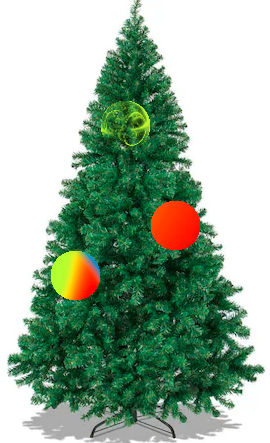

In [131]:
kt1 = kolorowe_tlo.resize(maska.size)
choinka.paste(kt1, (50,250), mask = maska)
choinka

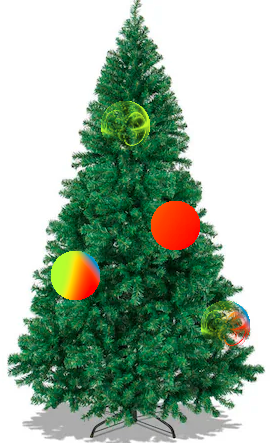

In [132]:
choinka.paste(kt1, (200,300), mask = new2)
choinka

staystyki z maską

In [133]:
wyc = choinka.crop((40,300, 80, 340))
statystyki(wyc)
tlo = Image.new('L', choinka.size, 0)
maska_czarne = Image.new('L', wyc.size, 255)
tlo.paste(maska_czarne,  (40,300))
print('------------------------------')
statystyki_z_maska(choinka, tlo)
# tlo


tryb obrazu RGB
rozmiar obrazu (40, 40)
extrema  [(0, 182), (6, 228), (0, 198)]
count  [1600, 1600, 1600]
mean  [23.28375, 96.03125, 55.280625]
median  [14, 96, 52]
stddev  [28.80864863087993, 31.94930004612777, 27.692338734916824]
------------------------------
tryb obrazu RGB tryb maski L
rozmiar obrazu (270, 443) rozmiar maski (270, 443)
extrema  [(0, 182), (6, 228), (0, 198)]
count  [1600, 1600, 1600]
mean  [23.28375, 96.03125, 55.280625]
median  [14, 96, 52]
stddev  [28.80864863087993, 31.94930004612777, 27.692338734916824]


Zastosowane paste i crop  - przewijanie obrazu z lewej na prawo

In [134]:
def roll(image, delta): 
    xsize, ysize = image.size
    delta = delta % xsize
    if delta == 0: return image
    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize - delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize - delta, ysize))
    return image

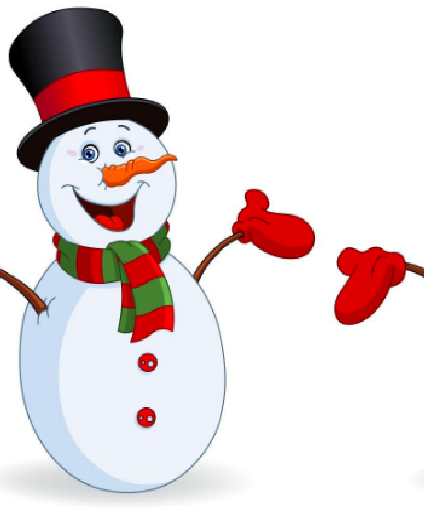

In [135]:
roll(im, 100)